# OUTLIER ANALYSES

This notebook contains the operations related to outliers in the data. Each catalogue, namely *CGRO/BATSE (BATSE)*, *FERMI/GBM (FERMI)*, and *SWIFT/BAT (SWIFT)*, is analyzed seperately in the following feature spaces:

<ol>
    <li>BATSE: </li>
    <ol>
        <li>T90, </li> 
        <li>Spectral Hardness (100-300 / 20-50 keV), </li> 
        <li>T90-Spectral Hardness </li> 
    </ol>
    <li>FERMI: </li>
    <ol>
        <li>T90, </li> 
        <li>Spectral Hardness (100-300 / 20-50 keV), </li> 
        <li>T90-Spectral Hardness </li> 
    </ol>
    <li>SWIFT: </li>
    <ol>
        <li>T90, </li> 
        <li>T90i, </li> 
        <li>Spectral Hardness (100-300 / 20-50 keV), </li> 
        <li>Luminosity, </li> 
        <li>T90-Spectral Hardness, </li> 
        <li>T90i-Spectral Hardness, </li> 
        <li>Spectral Hardnesss-Luminosty, </li> 
        <li>T90i-Spectral Hardness-Luminosity. </li> 
    </ol>

</ol>

Please note that each feature space is in log10 base. 

Throughout the notebook, for each feature space, the following steps are taken:

1. The dataset is loaded, 5 random samples are shown and the raw data is depicted as histogram or a scatter plot depending on the dimensions of the data.
2. Outliers are detected using Kernel Density Estimation algorithm. Threshold densities are fine-tuned for each feature space individually.
3. Outliers are plotted along with the inliers and log densities.
4. Normality check is done for inlier data.

In [1]:
%load_ext autoreload
%autoreload 2

In [45]:
# add grbttools to path
import sys
sys.path.append("../")

import warnings
from grbtools import data as data_operations
from grbtools import disp as disp_operations
import numpy as np
warnings.filterwarnings("ignore")
np.random.seed(1773)

## 1. BATSE

### a. T90

,lgT90
trigger_num,
2953,1.226136
1458,1.912371
6147,1.516297
676,1.891114
3800,1.342738


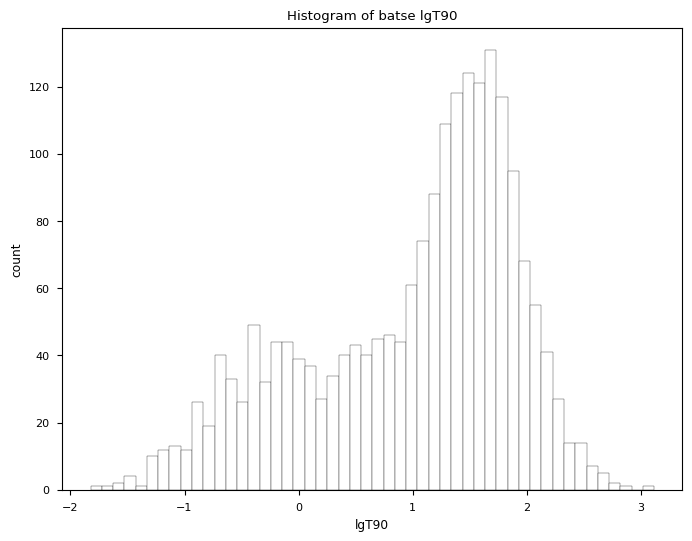

In [98]:
## Load dataset and the features
df_batse_t90 = data_operations.load(cat_name="batse", 
                                    feats=["lgT90"],
                                    plot_data=True)
df_batse_t90.sample(5)

Total number of GRBs: 2037
Number of outliers: 12
Number of inliers: 2025


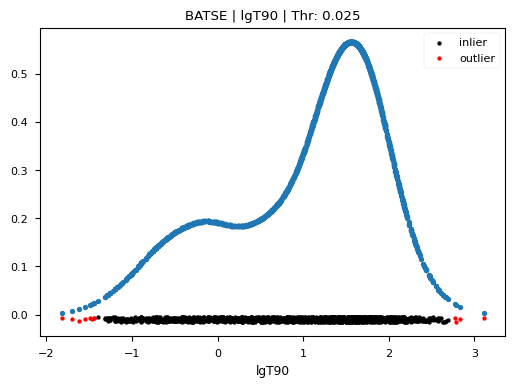

In [51]:
batse_outliers_t90 = data_operations.find_outliers(data = df_batse_t90.copy(), 
                       feat_space=["lgT90"], 
                       threshold_density = 0.025, 
                       cat_name = "batse", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [52]:
data_operations.check_for_normality(data=batse_outliers_t90, 
                                        feat_space=["lgT90"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.935, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.124, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=50.108
  > Critical values: [0.575 0.655 0.785 0.916 1.09 ]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=173.475, p=0.000
  > Sample does not look Gaussian (reject H0)


### b. Spectral Hardness

,lgHrd
trigger_num,
6593,0.618595
2252,0.613027
7597,0.509379
2119,0.752544
7290,1.168276


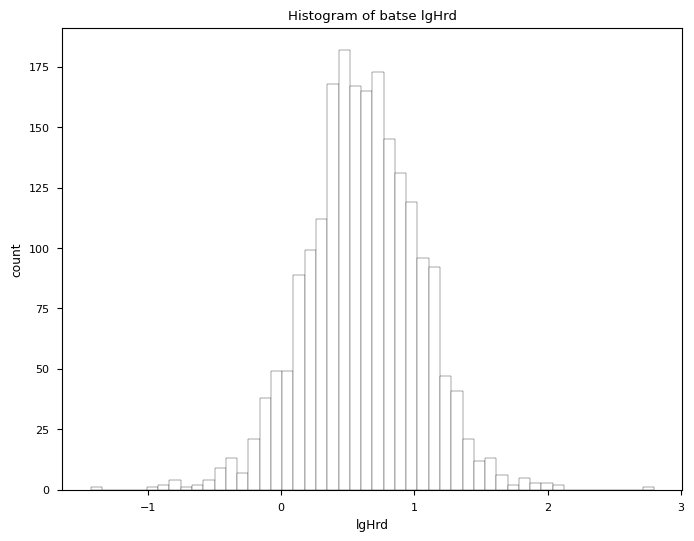

In [53]:
## Load dataset and the features
df_batse_hrd = data_operations.load(cat_name="batse", 
                                    feats=["lgHrd"],
                                    plot_data=True)
df_batse_hrd.sample(5)

Total number of GRBs: 2095
Number of outliers: 14
Number of inliers: 2081


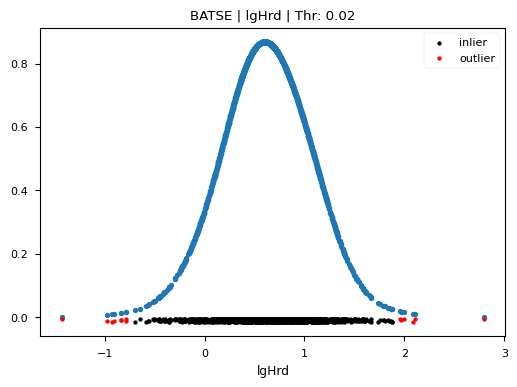

In [54]:
batse_outliers_hrd = data_operations.find_outliers(data = df_batse_hrd.copy(), 
                       feat_space=["lgHrd"], 
                       threshold_density = 0.02, 
                       cat_name = "batse", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [55]:
data_operations.check_for_normality(data=batse_outliers_hrd, 
                                        feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.999, p=0.263
  > Sample looks Gaussian (fail to reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.017, p=0.616
  > Sample looks Gaussian (fail to reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=0.428
  > Critical values: [0.575 0.655 0.785 0.916 1.09 ]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample looks Gaussian (fail to reject H0) at the 15.0% level
  > Sample looks Gaussian (fail to reject H0) at the 10.0% level
  > Sample looks Gaussian (fail to reject H0) at the 5.0% level
  > Sample looks Gaussian (fail to reject H0) at the 2.5% level
  > Sample looks Gaussian (fail to reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=0.685, p=0.710
  > Sample looks Gaussian (fail to reject H0)


### c. T90-Spectral Hardness

,lgT90,lgHrd
trigger_num,,
2894,0.577032,0.844461
6159,1.698275,0.060179
6339,1.182757,1.044111
1551,1.468938,1.247598
2090,1.581426,0.657938


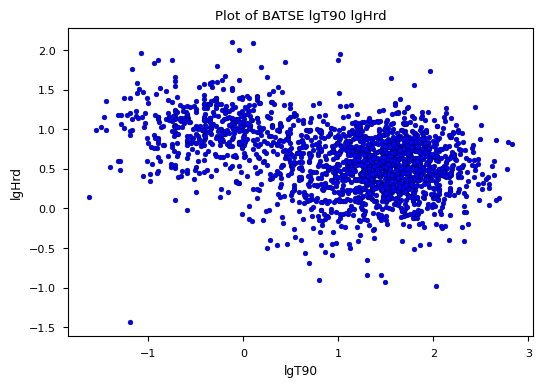

In [56]:
## Load dataset and the features
df_batse_t90_hrd = data_operations.load(cat_name="batse", 
                                        feats=["lgT90", "lgHrd"],
                                        plot_data=True)
df_batse_t90_hrd.sample(5)

Total number of GRBs: 1937
Number of outliers: 13
Number of inliers: 1924


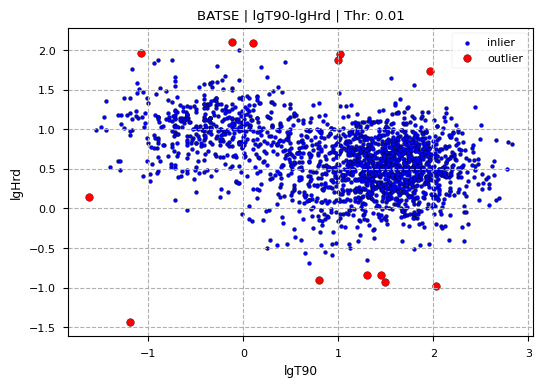

In [57]:
batse_outliers_t90_hrd = data_operations.find_outliers(data = df_batse_t90_hrd.copy(), 
                       feat_space=["lgT90", "lgHrd"], 
                       threshold_density = 0.01, 
                       cat_name = "batse", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [58]:
data_operations.check_for_normality(data=batse_outliers_t90_hrd, 
                                        feat_space=["lgT90", "lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.995, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.021, p=0.057
  > Sample looks Gaussian (fail to reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=3.437
  > Critical values: [0.575 0.655 0.786 0.917 1.091]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=23.006, p=0.000
  > Sample does not look Gaussian (reject H0)


-----

## 2. FERMI

### a. T90

,lgT90
1449,0.478278
459,1.109376
2056,1.429445
1007,0.899602
1649,1.952313


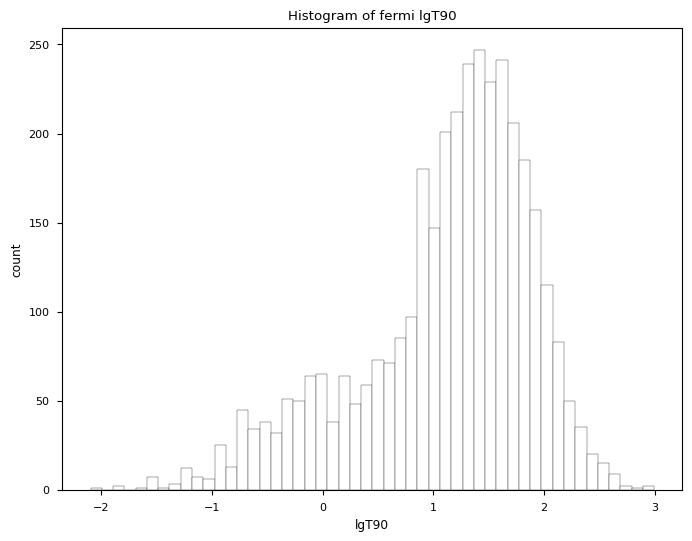

In [59]:
## Load dataset and the features
df_fermi_t90 = data_operations.load(cat_name="fermi", 
                                    feats=["lgT90"],
                                    plot_data=True)
df_fermi_t90.sample(5)

Total number of GRBs: 3568
Number of outliers: 13
Number of inliers: 3555


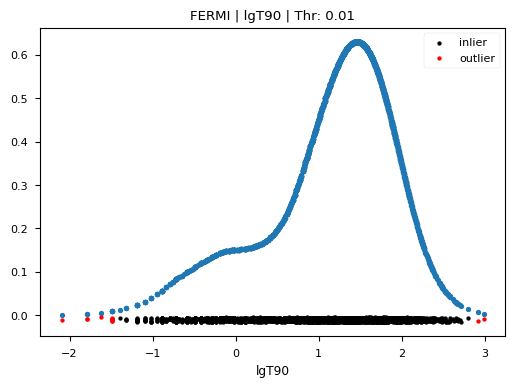

In [60]:
fermi_outliers_t90 = data_operations.find_outliers(data = df_fermi_t90.copy(), 
                       feat_space=["lgT90"], 
                       threshold_density = 0.01, 
                       cat_name = "fermi", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [61]:
data_operations.check_for_normality(data=fermi_outliers_t90, 
                                        feat_space=["lgT90"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.942, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.103, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=70.996
  > Critical values: [0.575 0.655 0.786 0.917 1.091]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=331.463, p=0.000
  > Sample does not look Gaussian (reject H0)


### b. Spectral Hardness

,lgHrd
2231,0.055546
327,0.237132
2418,1.191632
2715,-0.154024
2358,0.382925


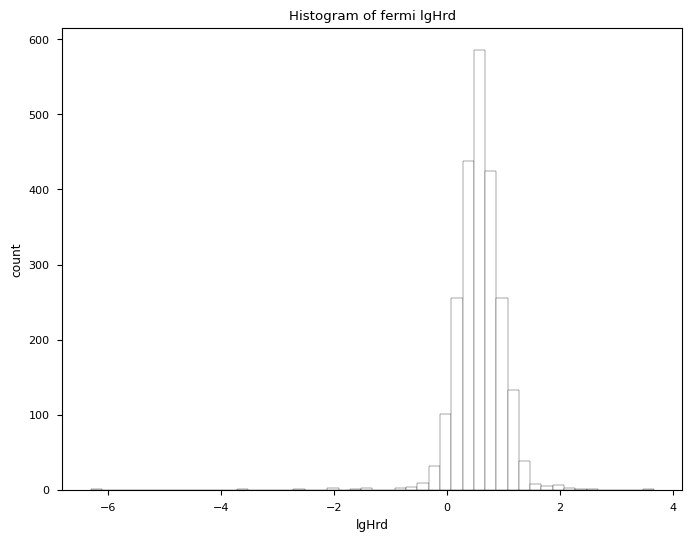

In [62]:
## Load dataset and the features
df_fermi_hrd = data_operations.load(cat_name="fermi", 
                                    feats=["lgHrd"],
                                    plot_data=True)
df_fermi_hrd.sample(5)

Total number of GRBs: 2311
Number of outliers: 12
Number of inliers: 2299


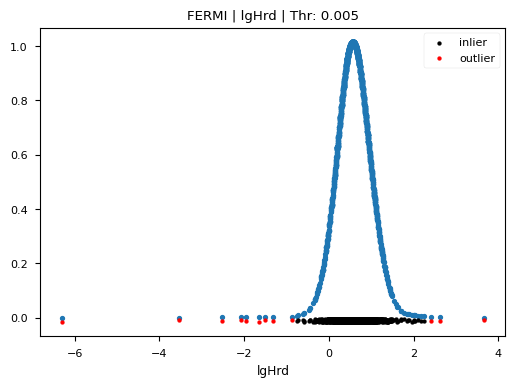

In [63]:
fermi_outliers_hrd = data_operations.find_outliers(data = df_fermi_hrd.copy(), 
                       feat_space=["lgHrd"], 
                       threshold_density = 0.005, 
                       cat_name = "fermi", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [64]:
data_operations.check_for_normality(data=fermi_outliers_hrd, 
                                        feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.990, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.035, p=0.007
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=3.089
  > Critical values: [0.575 0.655 0.786 0.916 1.09 ]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=78.378, p=0.000
  > Sample does not look Gaussian (reject H0)


-----

### c. T90-Spectral Hardness

,lgT90,lgHrd
1623,1.156428,0.866501
3537,0.449633,0.644150
640,0.638689,0.658848
1799,2.069113,0.418323
2492,-0.415669,1.069097


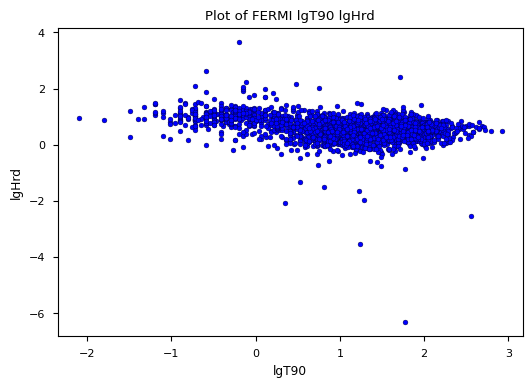

In [65]:
## Load dataset and the features
df_fermi_t90_hrd = data_operations.load(cat_name="fermi", 
                                        feats=["lgT90", "lgHrd"],
                                        plot_data=True)
df_fermi_t90_hrd.sample(5)

Total number of GRBs: 2310
Number of outliers: 19
Number of inliers: 2291


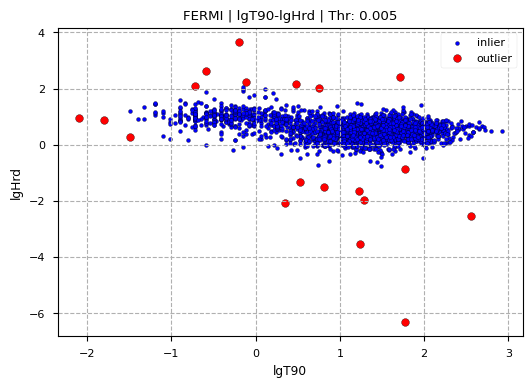

In [66]:
fermi_outliers_t90_hrd = data_operations.find_outliers(data = df_fermi_t90_hrd.copy(), 
                       feat_space=["lgT90", "lgHrd"], 
                       threshold_density = 0.005, 
                       cat_name = "fermi", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [67]:
data_operations.check_for_normality(data=fermi_outliers_t90_hrd, 
                                        feat_space=["lgT90", "lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.994, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.042, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=11.623
  > Critical values: [0.575 0.655 0.786 0.917 1.091]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=0.693, p=0.707
  > Sample looks Gaussian (fail to reject H0)


-----

## 3. SWIFT

### a. T90

,lgT90
818,0.859258
6,1.754318
201,1.755082
1137,1.518514
165,1.653213


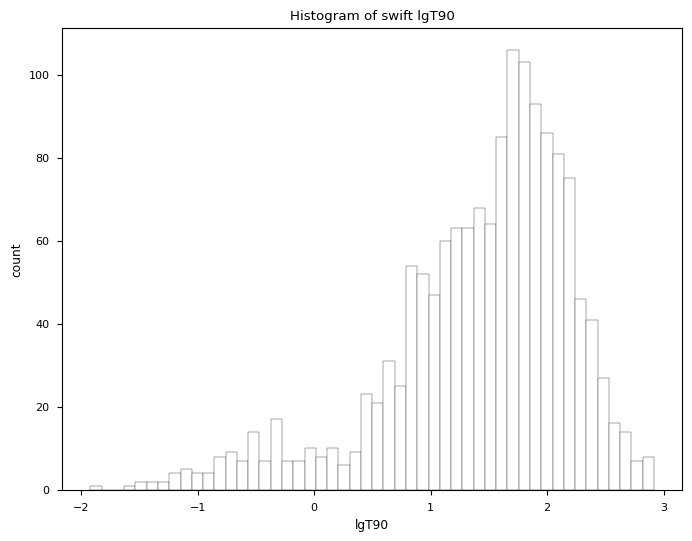

In [68]:
## Load dataset and the features
df_swift_t90 = data_operations.load(cat_name="swift", 
                                    feats=["lgT90"],
                                    plot_data=True)
df_swift_t90.sample(5)

Total number of GRBs: 1503
Number of outliers: 9
Number of inliers: 1494


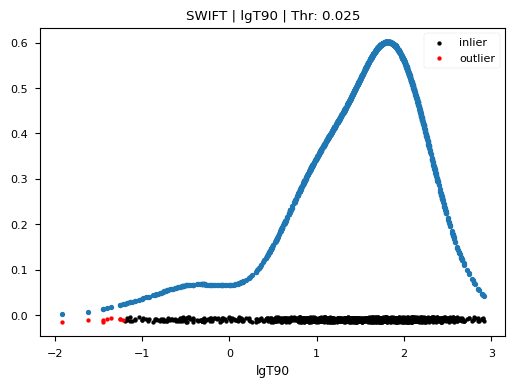

In [69]:
swift_outliers_t90 = data_operations.find_outliers(data = df_swift_t90.copy(), 
                       feat_space=["lgT90"], 
                       threshold_density = 0.025, 
                       cat_name = "swift", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [70]:
data_operations.check_for_normality(swift_outliers_t90, feat_space=["lgT90"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.933, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.091, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=26.814
  > Critical values: [0.574 0.654 0.785 0.916 1.089]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=222.943, p=0.000
  > Sample does not look Gaussian (reject H0)


### b. T90i

,lgT90i
911,2.129687
1294,0.406225
710,2.075233
346,1.163876
990,1.876995


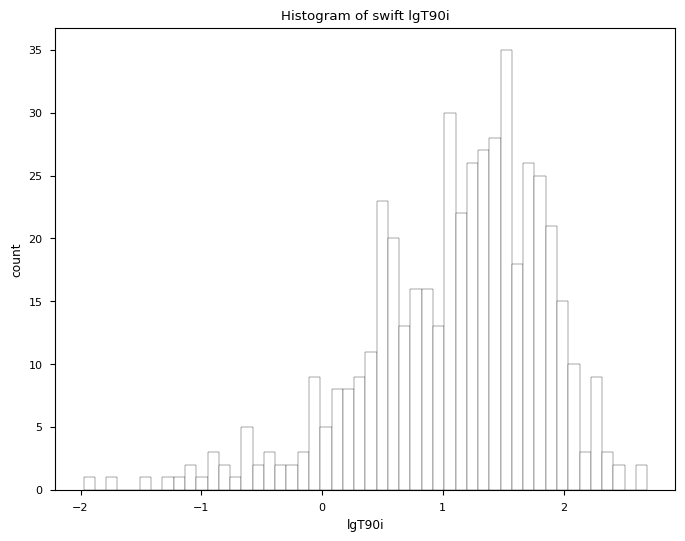

In [71]:
## Load dataset and the features
df_swift_t90i = data_operations.load(cat_name="swift", 
                                    feats=["lgT90i"],
                                    plot_data=True)
df_swift_t90i.sample(5)

Total number of GRBs: 484
Number of outliers: 4
Number of inliers: 480


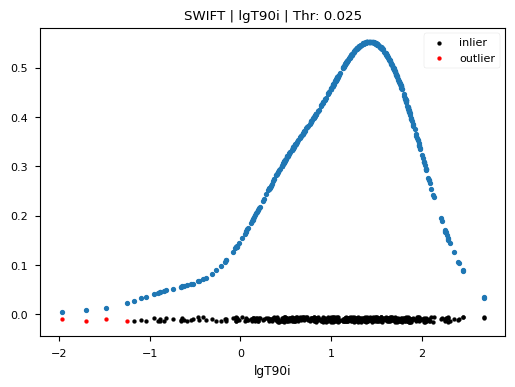

In [72]:
swift_outliers_t90i = data_operations.find_outliers(data = df_swift_t90i.copy(), 
                       feat_space=["lgT90i"], 
                       threshold_density = 0.025, 
                       cat_name = "swift", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       figsize = (6, 4),
                       verbose = True)

In [73]:
data_operations.check_for_normality(data=swift_outliers_t90i, 
                                        feat_space=["lgT90i"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.966, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.074, p=0.009
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=4.286
  > Critical values: [0.571 0.651 0.781 0.911 1.083]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=35.316, p=0.000
  > Sample does not look Gaussian (reject H0)


### c. Spectral Hardness

,lgHrd
201,-0.53908
691,0.02394
961,0.07518
46,-0.28530
659,0.21926


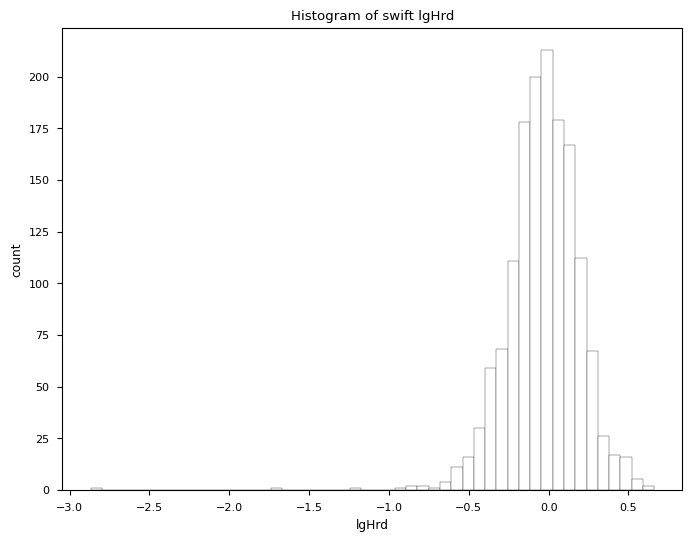

In [74]:
## Load dataset and the features
df_swift_hrd = data_operations.load(cat_name="swift", 
                                    feats=["lgHrd"],
                                    plot_data=True)
df_swift_hrd.sample(5)

Total number of GRBs: 1490
Number of outliers: 3
Number of inliers: 1487


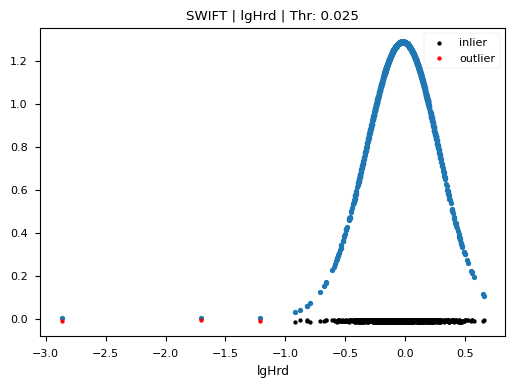

In [75]:
swift_outliers_hrd = data_operations.find_outliers(data = df_swift_hrd.copy(), 
                       feat_space=["lgHrd"], 
                       threshold_density = 0.025, 
                       cat_name = "swift", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [76]:
data_operations.check_for_normality(data=swift_outliers_hrd, 
                                        feat_space=["lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.993, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.032, p=0.085
  > Sample looks Gaussian (fail to reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=1.926
  > Critical values: [0.574 0.654 0.785 0.916 1.089]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=32.193, p=0.000
  > Sample does not look Gaussian (reject H0)


### d. Luminosity

,lgLum
1384,51.609509
1061,51.113571
484,50.984127
1457,51.742282
254,51.484180


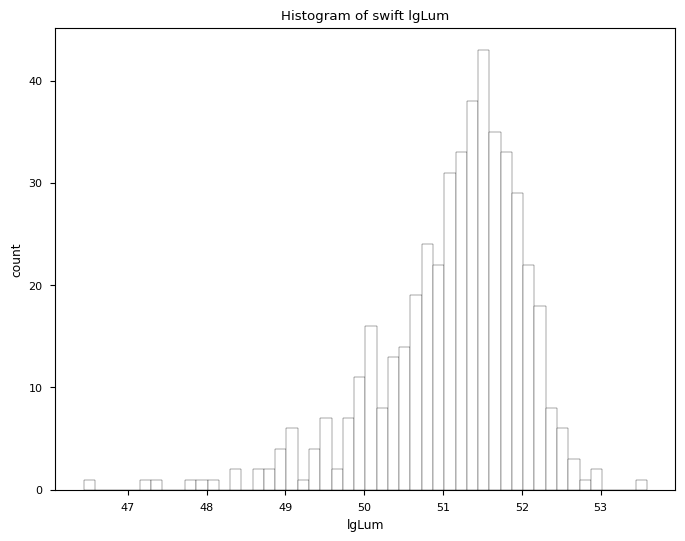

In [77]:
## Load dataset and the features
df_swift_lum = data_operations.load(cat_name = "swift", 
                                    feats=["lgLum"],
                                    plot_data = True)
df_swift_lum.sample(5)

Total number of GRBs: 473
Number of outliers: 10
Number of inliers: 463


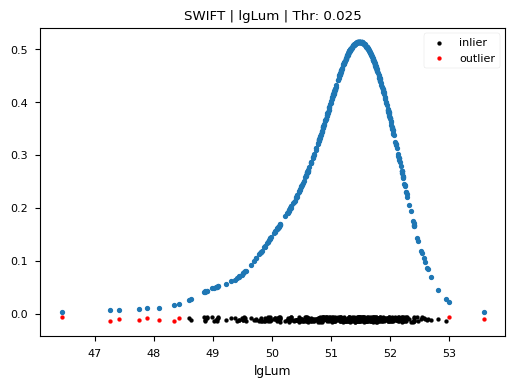

In [78]:
swift_outliers_lum = data_operations.find_outliers(data = df_swift_lum.copy(), 
                       feat_space=["lgLum"], 
                       threshold_density = 0.025, 
                       cat_name = "swift", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [79]:
data_operations.check_for_normality(data=swift_outliers_lum, 
                                        feat_space=["lgLum"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.959, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.085, p=0.002
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=5.505
  > Critical values: [0.571 0.65  0.78  0.91  1.083]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=40.176, p=0.000
  > Sample does not look Gaussian (reject H0)


### e. T90-Spectral Hardness

,lgT90,lgHrd
76,1.851723,-0.31074
1109,1.579784,-0.06284
44,1.890041,0.04482
494,0.789299,-0.46727
285,-1.075721,-1.70411


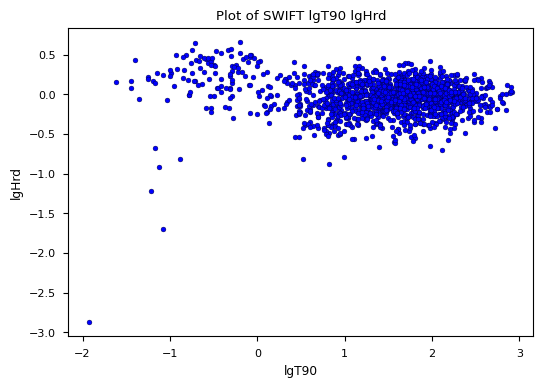

In [80]:
## Load dataset and the features
df_swift_t90_hrd = data_operations.load(cat_name="swift", 
                                        feats=["lgT90", "lgHrd"],
                                        plot_data=True)
df_swift_t90_hrd.sample(5)

Total number of GRBs: 1477
Number of outliers: 7
Number of inliers: 1470


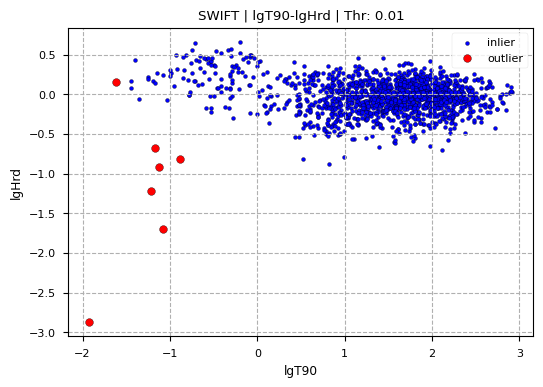

In [81]:
swift_outliers_t90_hrd = data_operations.find_outliers(data = df_swift_t90_hrd.copy(), 
                       feat_space=["lgT90", "lgHrd"], 
                       threshold_density = 0.01, 
                       cat_name = "swift", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [82]:
data_operations.check_for_normality(data=swift_outliers_t90_hrd, 
                                        feat_space=["lgT90", "lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.904, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.192, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=127.428
  > Critical values: [0.575 0.655 0.786 0.917 1.091]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=1845.568, p=0.000
  > Sample does not look Gaussian (reject H0)


### f. T90i-Spectral Hardness

,lgT90i,lgHrd
29,1.832551,0.00839
404,0.910046,-0.05399
998,-1.485880,0.16727
911,2.129687,-0.13813
961,1.967220,0.07518


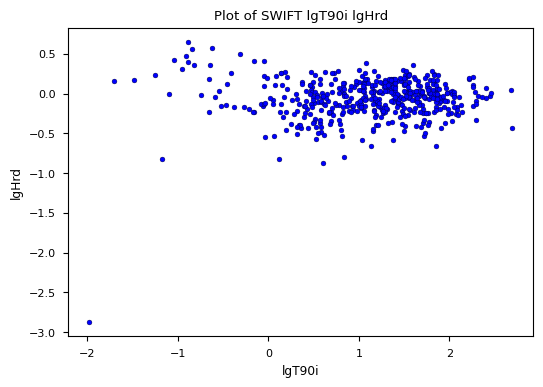

In [83]:
## Load dataset and the features
df_swift_t90i_hrd = data_operations.load(cat_name="swift", 
                                        feats=["lgT90i", "lgHrd"],
                                        plot_data=True)
df_swift_t90i_hrd.sample(5)

Total number of GRBs: 478
Number of outliers: 3
Number of inliers: 475


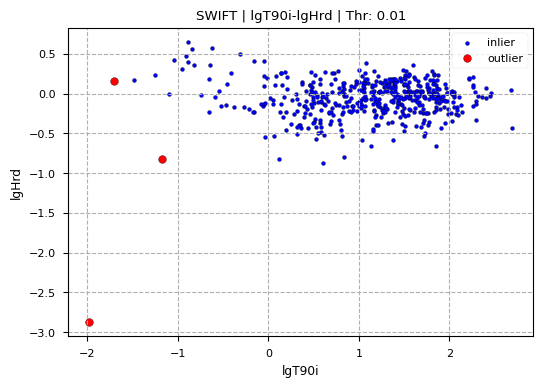

In [84]:
swift_outliers_t90i_hrd = data_operations.find_outliers(data = df_swift_t90i_hrd.copy(), 
                       feat_space=["lgT90i", "lgHrd"], 
                       threshold_density = 0.01, 
                       cat_name = "swift", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [85]:
data_operations.check_for_normality(data=swift_outliers_t90i_hrd, 
                                        feat_space=["lgT90i", "lgHrd"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.924, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.170, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=32.918
  > Critical values: [0.574 0.653 0.784 0.914 1.087]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=120.742, p=0.000
  > Sample does not look Gaussian (reject H0)


### g. Spectral Hardness-Luminosity

,lgHrd,lgLum
869,0.10087,51.877536
95,-0.48461,51.004125
890,0.55471,51.040376
45,0.14387,52.269282
1472,0.36270,48.899325


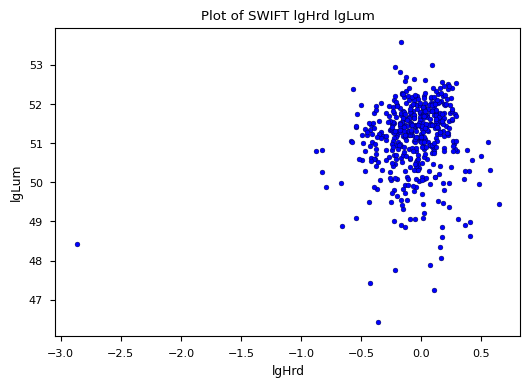

In [86]:
## Load dataset and the features
df_swift_hrd_lum = data_operations.load(cat_name="swift", 
                                        feats=["lgHrd", "lgLum"],
                                        plot_data=True)
df_swift_hrd_lum.sample(5)

Total number of GRBs: 473
Number of outliers: 7
Number of inliers: 466


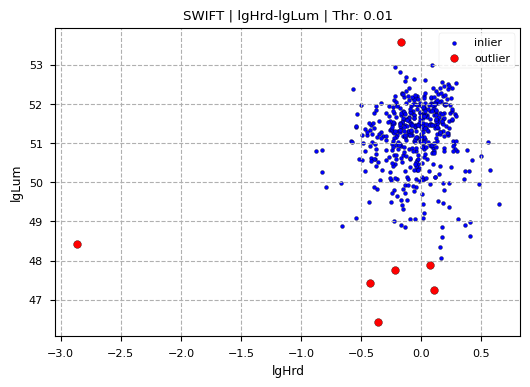

In [87]:
swift_outliers_hrd_lum = data_operations.find_outliers(data = df_swift_hrd_lum.copy(), 
                       feat_space=["lgHrd", "lgLum"], 
                       threshold_density = 0.01, 
                       cat_name = "swift", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       verbose = True,
                       figsize = (6,4))

In [88]:
data_operations.check_for_normality(data=swift_outliers_hrd_lum, 
                                        feat_space=["lgHrd", "lgLum"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.654, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.335, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=157.780
  > Critical values: [0.574 0.653 0.784 0.914 1.087]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=3537.319, p=0.000
  > Sample does not look Gaussian (reject H0)


### h. T90i-Spectral Harness-Luminosity

,lgT90i,lgHrd,lgLum
70,1.667160,-0.03197,51.136809
196,0.431517,-0.19605,51.299405
1189,1.130756,-0.07139,50.788782
1203,0.115854,-0.82235,50.814638
1484,0.740042,0.18793,52.460615


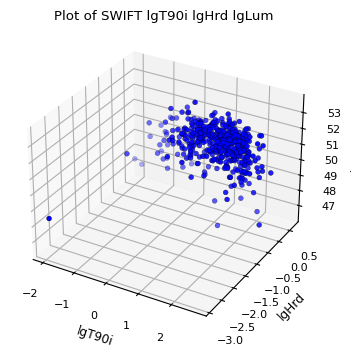

In [89]:
## Load dataset and the features
df_swift_t90i_hrd_lum = data_operations.load(cat_name="swift", 
                                            feats=["lgT90i", "lgHrd", "lgLum"],
                                            plot_data=True)
df_swift_t90i_hrd_lum.sample(5)

Total number of GRBs: 473
Number of outliers: 28
Number of inliers: 445


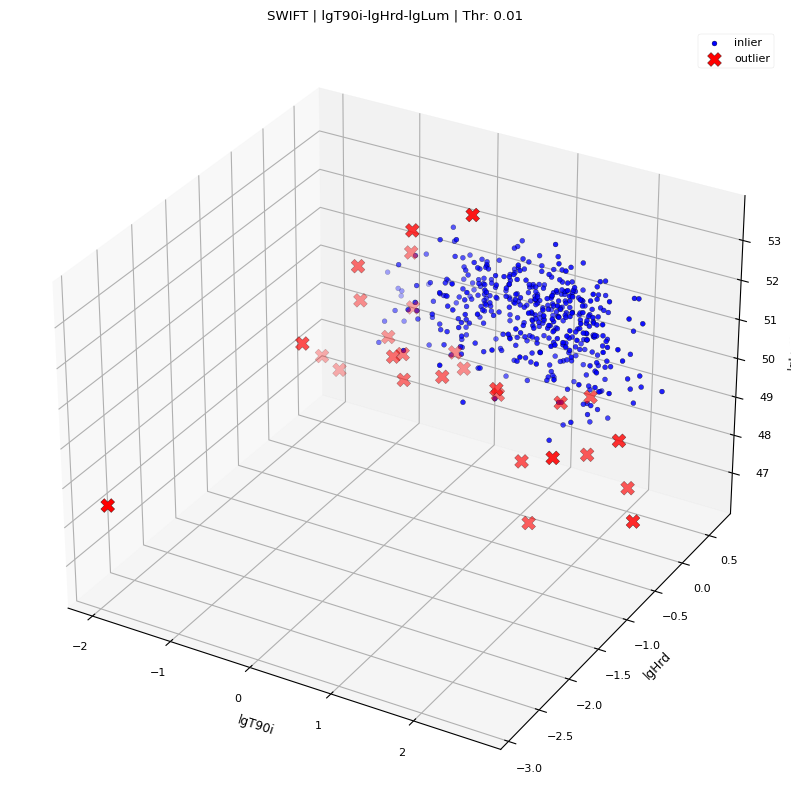

In [90]:
swift_outliers_t90i_hrd_lum = data_operations.find_outliers(data = df_swift_t90i_hrd_lum.copy(), 
                       feat_space=["lgT90i", "lgHrd", "lgLum"], 
                       threshold_density = 0.01, 
                       cat_name = "swift", 
                       save_data = True,
                       plot_result = True,
                       save_plot = True,
                       figsize=(15,10),
                       verbose = True)

In [91]:
data_operations.check_for_normality(data=swift_outliers_t90i_hrd_lum, 
                                        feat_space=["lgT90i", "lgHrd", "lgLum"])

::: Shapiro-Wilkinson Normality Test :::
  > Statistics=0.623, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Kolmogorov-Smirnov Normality Test :::
  > Statistics=0.401, p=0.000
  > Sample does not look Gaussian (reject H0)

::: Anderson-Darling Normality Test :::
  > Statistics=252.349
  > Critical values: [0.574 0.654 0.785 0.915 1.089]
  > Significance levels: [15.  10.   5.   2.5  1. ]
  > Sample does not look Gaussian (reject H0) at the 15.0% level
  > Sample does not look Gaussian (reject H0) at the 10.0% level
  > Sample does not look Gaussian (reject H0) at the 5.0% level
  > Sample does not look Gaussian (reject H0) at the 2.5% level
  > Sample does not look Gaussian (reject H0) at the 1.0% level

::: D'Agostino's K^2 Normality Test :::
  > Statistics=9330.376, p=0.000
  > Sample does not look Gaussian (reject H0)
